**Alison Glazer**
# Airbnb Smart Pricing - Exploratory Data Analysis & Regression Modeling to Predict Base Price
Now that we have isolated listings with the highest booking frequency, we need to build a model that will suggest an appropriate price for any listing. We'll use regression to predict the base price for these popular Airbnb listings, optimizing mean absolute error. We will investigate feature importances and interactions to find the features with the most predictive power.

We are only considering listings with high occupancy rates

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Display-Options" data-toc-modified-id="Display-Options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Display Options</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Set-Up-Target-and-Features" data-toc-modified-id="Set-Up-Target-and-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Set Up Target and Features</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Extract-text-for-NLP,-bring-features-back-in" data-toc-modified-id="Extract-text-for-NLP,-bring-features-back-in-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Extract text for NLP, bring features back in</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Initial-Modeling" data-toc-modified-id="Initial-Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Initial Modeling</a></span><ul class="toc-item"><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Standardize-the-feature-data" data-toc-modified-id="Standardize-the-feature-data-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Standardize the feature data</a></span></li><li><span><a href="#Helper-Functions-&amp;-Variables" data-toc-modified-id="Helper-Functions-&amp;-Variables-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Helper Functions &amp; Variables</a></span></li><li><span><a href="#Ordinary-Least-Squares-with-statsmodel---inspect-summary-stats" data-toc-modified-id="Ordinary-Least-Squares-with-statsmodel---inspect-summary-stats-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Ordinary Least Squares with statsmodel - inspect summary stats</a></span><ul class="toc-item"><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Multicollinearity</a></span></li></ul></li></ul></li><li><span><a href="#Drop-Collinear-Columns" data-toc-modified-id="Drop-Collinear-Columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Drop Collinear Columns</a></span></li><li><span><a href="#OLS-with-Transformed-Target-in-SciKit-Learn" data-toc-modified-id="OLS-with-Transformed-Target-in-SciKit-Learn-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>OLS with Transformed Target in SciKit Learn</a></span></li><li><span><a href="#Linear-Regression-with-Polynomial-Features" data-toc-modified-id="Linear-Regression-with-Polynomial-Features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Linear Regression with Polynomial Features</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Regularization</a></span><ul class="toc-item"><li><span><a href="#LASSO" data-toc-modified-id="LASSO-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>LASSO</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#GridSearch-XGBoost" data-toc-modified-id="GridSearch-XGBoost-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>GridSearch XGBoost</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Rerun-Models-on-Selected-Features" data-toc-modified-id="Rerun-Models-on-Selected-Features-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Rerun Models on Selected Features</a></span><ul class="toc-item"><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Set-Up-for-Flask-App" data-toc-modified-id="Set-Up-for-Flask-App-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Set Up for Flask App</a></span></li><li><span><a href="#Sandbox:-Model-on-Clustered-Data" data-toc-modified-id="Sandbox:-Model-on-Clustered-Data-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Sandbox: Model on Clustered Data</a></span><ul class="toc-item"><li><span><a href="#Split-on-accommodates-(1)" data-toc-modified-id="Split-on-accommodates-(1)-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Split on accommodates (1)</a></span><ul class="toc-item"><li><span><a href="#Accommodates-1-(a)" data-toc-modified-id="Accommodates-1-(a)-16.1.1"><span class="toc-item-num">16.1.1&nbsp;&nbsp;</span>Accommodates 1 (a)</a></span></li></ul></li><li><span><a href="#Split-on-minimum-nights-(2)" data-toc-modified-id="Split-on-minimum-nights-(2)-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Split on minimum nights (2)</a></span><ul class="toc-item"><li><span><a href="#Minimum-nights-3-or-more-(a)" data-toc-modified-id="Minimum-nights-3-or-more-(a)-16.2.1"><span class="toc-item-num">16.2.1&nbsp;&nbsp;</span>Minimum nights 3 or more (a)</a></span></li><li><span><a href="#Minimum-nights-1-or-2-(b)" data-toc-modified-id="Minimum-nights-1-or-2-(b)-16.2.2"><span class="toc-item-num">16.2.2&nbsp;&nbsp;</span>Minimum nights 1 or 2 (b)</a></span></li></ul></li><li><span><a href="#Split-on-accommodates-(3)" data-toc-modified-id="Split-on-accommodates-(3)-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>Split on accommodates (3)</a></span><ul class="toc-item"><li><span><a href="#Accommodates-1-(a)" data-toc-modified-id="Accommodates-1-(a)-16.3.1"><span class="toc-item-num">16.3.1&nbsp;&nbsp;</span>Accommodates 1 (a)</a></span></li></ul></li></ul></li></ul></div>

## Import Libraries

In [6]:
# Working with data
import pandas as pd
import numpy as np
import datetime as dt
import re
from collections import Counter

# Saving
import pickle
import joblib

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.model_selection import \
    train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.linear_model import\
    LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import\
    mean_squared_error, r2_score, mean_absolute_error

from sklearn.pipeline import make_pipeline

import scipy.stats as stats
import scipy.special

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBRegressor
import shap


<a id='display'></a>
## Display Options

In [7]:
pd.options.display.max_columns = 200

In [8]:
# Colors sourced from here: https://usbrandcolors.com/airbnb-colors/
bnb_red = '#FF5A5F'
bnb_blue = '#00A699'
bnb_orange = '#FC642D'
bnb_lgrey = '#767676'
bnb_dgrey = '#484848'
bnb_maroon = '#92174D'

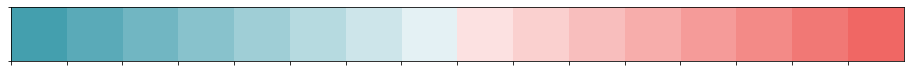

In [9]:
# Create diverging colormap for heatmaps
bnb_cmap = sns.diverging_palette(210,
                                 13,
                                 s=81,
                                 l=61,
                                 sep=3,
                                 n=16,
                                 as_cmap=True)

# Test colors
sns.palplot(sns.diverging_palette(210, 13, s=81, l=61, sep=3, n=16))

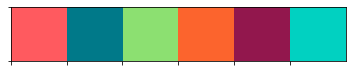

In [10]:
# Create color palette
bnb_palette = sns.color_palette(
    ["#FF5A5F", "#007989", "#8CE071", "#FC642D", "#92174D", "#01D1C1"])

# Test colors
sns.palplot(bnb_palette)

## Load the Data

In [11]:
# Load cleaned dataset
with open('data/lax_listings_detailed_cleaned.pickle', 'rb') as to_read:
    lax_listings_detailed_cleaned = pickle.load(to_read)

## Set Up Target and Features

In [1379]:
X = lax_listings_detailed_cleaned[
    (lax_listings_detailed_cleaned.occupancy_rate >= 0.65)
    & (lax_listings_detailed_cleaned.occupancy_rate <= 3) &
    (lax_listings_detailed_cleaned.number_of_reviews > 0) &
    (lax_listings_detailed_cleaned.price != '$0.00')]

untransformed_y = X['price'].str.replace('$', '').str.replace(',', '')

y = np.log(untransformed_y.astype(float))

# Get unit names for time series analysis
X_id = lax_listings_detailed_cleaned.loc[X.index].id
# Save for later
with open('data/lax_X_id.pickle', 'wb') as to_write:
    pickle.dump(X_id, to_write)X = lax_listings_detailed_cleaned[
    (lax_listings_detailed_cleaned.occupancy_rate >= 0.65)
    & (lax_listings_detailed_cleaned.occupancy_rate <= 3) &
    (lax_listings_detailed_cleaned.number_of_reviews > 0) &
    (lax_listings_detailed_cleaned.price != '$0.00')]

untransformed_y = X['price'].str.replace('$', '').str.replace(',', '')

y = np.log(untransformed_y.astype(float))

In [1380]:
# Get listing unit names for time series analysis
X_id = lax_listings_detailed_cleaned.loc[X.index].id
# Save for later
with open('data/lax_X_id.pickle', 'wb') as to_write:
    pickle.dump(X_id, to_write)

In [1381]:
# Delete columns that won't be a part of the model
cols_to_delete = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
    'space', 'description', 'experiences_offered', 'neighborhood_overview',
    'notes', 'transit', 'access', 'interaction', 'house_rules',
    'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_response_time', 'host_acceptance_rate', 'host_thumbnail_url',
    'host_picture_url', 'host_neighbourhood', 'host_listings_count',
    'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
    'host_identity_verified', 'street', 'neighbourhood', 'city', 'state',
    'zipcode', 'market', 'smart_location', 'country_code', 'country',
    'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type',
    'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
    'monthly_price', 'guests_included', 'extra_people',
    'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
    'has_availability', 'availability_30', 'availability_60',
    'availability_90', 'calendar_last_scraped', 'first_review', 'last_review',
    'requires_license', 'license', 'jurisdiction_names',
    'is_business_travel_ready', 'cancellation_policy',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'est_bookings',
    'est_booked_nights_per_year', 'est_booked_nights',
    'neighbourhood_cleansed', 'neighbourhood_compressed',
    'neighbourhood_group_cleansed', 'bed_Couch', 'occupancy_rate',
    'occupancy_rate2','room_type_num'
]
X.drop(columns=cols_to_delete, inplace=True)

/anaconda3/envs/metis/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Extract text for NLP, bring features back in
Analysis done in separate notebook

In [1382]:
text_cols = ['name','summary','space','description']

In [1383]:
text_feat = lax_listings_detailed_cleaned.loc[X.index.values][text_cols].apply(
    lambda x: x.str.cat(sep=' '), axis=1)

In [1384]:
# Save for later
with open('data/lax_text_feat.pickle', 'wb') as to_write:
    pickle.dump(text_feat, to_write)

In [1385]:
# Load in topics created using LDA
# Load LAX Listings Features
with open('data/lax_lda_feats.pickle', 'rb') as to_read:
    lda_feats = pickle.load(to_read)

In [1386]:
# Rename columns
lda_feats = lda_feats.add_prefix('topic_')

In [1387]:
# Set index to same as X
lda_feats.set_index(X.index,inplace=True)

In [1388]:
# Merge with features dataframe
X = X.merge(lda_feats,left_index=True,right_index=True)

In [1389]:
# Save - checkpoint
with open('data/lax_X.pickle', 'wb') as to_write:
    pickle.dump(X, to_write)

## Data Exploration
To get a feel for what is going on in the data and what we expect to be important/influential features in the model, we'll look at summary statistics and visualizations of the data before building a model

In [1805]:
# Set up the data to make plotting easier
lax_listings_eda = lax_listings_detailed_cleaned.copy()
lax_listings_eda['price'] = lax_listings_eda['price'].str.replace(
    '$', '').str.replace(',', '').apply(float)

In [1812]:
# Trim out some more outliers to better visualize the bulk of the data
lax_listings_eda = lax_listings_eda[(lax_listings_eda.host_listings_count < 30)
                                    & (lax_listings_eda.security_deposit < 500)
                                    & (lax_listings_eda.accommodates <= 12)
                                   & (lax_listings_eda.price<500)
                                   & (lax_listings_eda.bedrooms<=6)
                                   & (lax_listings_eda.number_of_reviews_ltm<=365)]

(array([2.4211e+04, 4.4760e+03, 2.5890e+03, 1.1080e+03, 4.1500e+02,
        1.5200e+02, 4.5000e+01, 1.8000e+01, 9.0000e+00, 6.0000e+00]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <a list of 10 Patch objects>)

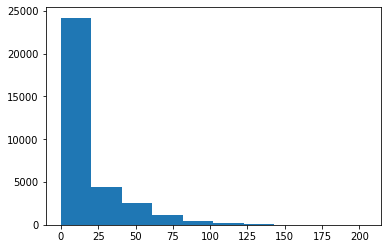

In [1813]:
plt.hist(lax_listings_eda.number_of_reviews_ltm)

In [1814]:
# Isolate numerical columns to look at summary statistics for each
num_cols = [
    'price', 'host_response_rate', 'host_is_superhost',
    'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights',
    'maximum_nights', 'availability_365', 'number_of_reviews',
    'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'instant_bookable', 'reviews_per_month',
    'est_bookings', 'est_booked_nights_per_year', 'est_booked_nights',
    'occupancy_rate', 'occupancy_rate2', 'transit_bin', 'house_rules_bin',
    'host_response_time_num', 'cancellation_policy_num', 'amenities_num',
    'room_Entire home/apt', 'room_Private room', 'room_Shared room',
    'amen_group_kitchen', 'amen_group_cleaning', 'amen_group_safety',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_electronics',
    'amen_group_extra_spaces', 'host_since_num'
]
lax_listings_eda[num_cols].describe()

,price,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,est_bookings,est_booked_nights_per_year,est_booked_nights,occupancy_rate,occupancy_rate2,transit_bin,house_rules_bin,host_response_time_num,cancellation_policy_num,amenities_num,room_Entire home/apt,room_Private room,room_Shared room,amen_group_kitchen,amen_group_cleaning,amen_group_safety,amen_group_household,amen_group_bedroom,amen_group_electronics,amen_group_extra_spaces,host_since_num
count,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,27608.000000,33029.000000,27608.000000,33029.000000,27608.000000,27608.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000,33029.000000
mean,115.436798,75.065064,0.295528,3.938721,3.078991,1.240153,1.170577,1.666142,85.788913,51.023979,1.693542,3.921069,638.753913,149.706046,37.636622,15.352357,94.724212,9.688062,9.510158,9.798480,9.789761,9.736989,9.554967,0.486815,2.088900,75.194647,190.915766,294.247691,1.207096,18.248188,0.621757,0.684247,2.130461,2.427745,26.323988,0.557510,0.397136,0.039632,4.020285,4.444579,3.576796,6.663901,1.543280,2.292319,1.202549,1497.224227
std,75.719653,40.622083,0.456287,5.089843,1.898739,0.526562,0.757646,1.162309,115.973215,48.136114,1.288170,6.901150,5562.040219,136.287696,64.185551,22.235869,7.913792,0.792417,0.930031,0.679745,0.696713,0.670541,0.855587,0.499834,2.070962,128.416192,289.018310,873.174587,2.704687,83.058903,0.484956,0.464822,1.600238,1.291793,11.933805,0.496689,0.489312,0.195096,3.576939,1.692314,1.649741,3.533298,1.047373,0.975239,1.453229,807.618321
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.010000,0.000000,0.720000,0.000000,0.006904,0.001973,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000
25%,65.000000,70.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,30.000000,12.000000,2.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,0.460000,4.000000,43.920000,12.000000,0.284138,0.451136,0.000000,0.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,873.000000
50%,97.000000,100.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,2.000000,1124.000000,103.000000,11.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,1.400000,22.000000,123.600000,80.000000,0.611570,1.440000,1.000000,1.000000,1.000000,2.000000,24.000000,1.000000,0.000000,0.000000,2.000000,5.000000,4.000000,6.000000,1.000000,2.000000,1.000000,1470.000000
75%,145.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,2.000000,150.000000,75.000000,2.000000,3.000000,1125.000000,297.000000,45.000000,22.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,3.170000,90.000000,254.160000,312.000000,1.129316,6.480000,1.000000,1.000000,3.000000,4.000000,34.000000,1.000000,1.000000,0.000000,8.000000,6.000000,5.0

In [1816]:
# See if neighbourhood has a significant influence 
lax_listings_eda.groupby('neighbourhood_compressed')[num_cols].agg(
    [np.size,np.sum,np.mean, np.std])

price                                    \
                                size       sum        mean         std   
neighbourhood_compressed                                                 
Alhambra                       293.0   24978.0   85.249147   57.080357   
Altadena                       183.0   19191.0  104.868852   68.532693   
Arcadia                        216.0   19697.0   91.189815   60.642499   
Bel Air/Beverly Crest          176.0   30055.0  170.767045   95.852847   
Beverly Hills                  279.0   42484.0  152.272401   91.397607   
Brentwood                      202.0   27355.0  135.420792   75.601312   
Burbank                        294.0   31384.0  106.748299   65.431500   
Culver City                    249.0   30516.0  122.554217   77.856141   
Del Rey                        296.0   38498.0  130.060811   77.833741   
Downtown                      1217.0  187244.0  153.857025   83.566537   
Eagle Rock                     162.0   18580.0  114.691358   72.487333   
East Hollywood                 211.0   19372.0   91.810427   48.182709   
Echo Park                      804.0   87068.0  108.293532   63.926471   
Encino                         146.0   17632.0  120.767123   82.818376   
Glendale                       410.0   50308.0  122.702439   73.620943   
Hawthorne                      185.0   16690.0   90.216216   69.815337   
Highland Park                  250.0   25328.0  101.312000   57.828081   
Hollywood                     3124.0  388700.0  124.423816   72.494996   
Hollywood Hills                318.0   47102.0  148.119497   87.396725   
Inglewood                      329.0   26706.0   81.173252   53.725225   
Long Beach                    1335.0  149188.0  111.751311   66.129305   
Malibu                          98.0   22570.0  230.306122  102.544072   
Manhattan Beach                119.0   21467.0  180.394958   96.977039   
Mar Vista                      452.0   54384.0  120.318584   79.402817   
Marina Del Rey                 400.0   73699.0  184.247500   85.406304   
Mid-City                       185.0   16464.0   88.994595   64.529695   
Mid-Wilshire                  2865.0  318455.0  111.153578   70.093733   
Monterey Park                  287.0   24853.0   86.595819   66.764357   
North Hollywood                630.0   64852.0  102.939683   64.131915   
Other                         6976.0  639944.0   91.735092   68.569726   
Pacific Palisades              105.0   19012.0  181.066667   97.152266   
Palms                          179.0   16261.0   90.843575   40.951713   
Pasadena                       442.0   50693.0  114.690045   65.642137   
Redondo Beach                  247.0   29829.0  120.765182   76.642619   
Santa Monica                   649.0   99199.0  152.848998   82.515947   
Sherman Oaks                   316.0   35787.0  113.250000   78.782829   
Silver Lake                    535.0   67777.0  126.685981   67.235363   
South LA                       927.0   76765.0   82.810140   53.408372   
South Robertson                402.0   43075.0  107.151741   65.819025   
Studio City                    296.0   39434.0  133.222973   79.639810   
Temple City                    209.0   16411.0   78.521531   47.114741   
Topanga                        177.0   27713.0  156.570621   87.418708   
Torrance                       246.0   24266.0   98.642276   72.776216   
Valley Glen                    171.0   16236.0   94.947368   58.571551   
Van Nuys                       209.0   18763.0   89.775120   66.587148   
Venice                        1486.0  241971.0  162.833782   80.400630   
West Adams                     230.0   17650.0   76.739130   63.069738   
West Hollywood                 836.0  122923.0  147.037081   80.819203   
West Los Angeles               457.0   53361.0  116.763676   60.306717   
Westchester/Playa Del Rey      440.0   47403.0  107.734091   65.388690   
Westlake                       806.0   96598.0  119.848635   66.968014   
Westside                       189.

In [1817]:
# Look at summary stats grouped by the number of persons accommodated in each listing
lax_listings_eda.groupby('accommodates')[num_cols].agg(
    [np.size,np.sum,np.mean, np.std])

price                                    host_response_rate  \
                 size        sum        mean         std               size   
accommodates                                                                  
1              4228.0   265184.0   62.720908   41.964574             4228.0   
2             14202.0  1275681.0   89.824039   49.001332            14202.0   
3              3371.0   371749.0  110.278552   53.696712             3371.0   
4              5610.0   780774.0  139.175401   69.365473             5610.0   
5              1487.0   243883.0  164.010087   73.258438             1487.0   
6              2345.0   456392.0  194.623454   88.394382             2345.0   
7               454.0    93541.0  206.037445   88.127746              454.0   
8               811.0   191622.0  236.278668   95.362913              811.0   
9               129.0    30573.0  237.000000   95.579319              129.0   
10              246.0    65816.0  267.544715  103.844094              246.0   
11               33.0     8126.0  246.242424   88.864725               33.0   
12              113.0    29421.0  260.362832  105.377219              113.0   

                                              host_is_superhost        \
                    sum       mean        std              size   sum   
accommodates                                                            
1              271754.0  64.274834  45.415915              4228   781   
2             1035667.0  72.924025  42.015326             14202  4574   
3              252700.0  74.962919  40.627308              3371   997   
4              440478.0  78.516578  38.258476              5610  1691   
5              120521.0  81.049765  35.737663              1487   493   
6              198900.0  84.818763  32.633736              2345   680   
7               40574.0  89.370044  26.979341               454   135   
8               71582.0  88.263872  28.424809               811   229   
9               11840.0  91.782946  23.037999               129    50   
10              22018.0  89.504065  25.438000               246    88   
11               3164.0  95.878788  17.501353                33    14   
12              10126.0  89.610619  24.359082               113    29   

                                 host_listings_count                     \
                  mean       std                size      sum      mean   
accommodates                                                              
1             0.184721  0.388117              4228.0  17487.0  4.135998   
2             0.322067  0.467285             14202.0  46774.0  3.293480   
3             0.295758  0.456450              3371.0  11904.0  3.531296   
4             0.301426  0.458918              5610.0  25698.0  4.580749   
5             0.331540  0.470925              1487.0   6358.0  4.275723   
6             0.289979  0.453849              2345.0  11820.0  5.040512   
7             0.297357  0.457599               454.0   2326.0  5.123348   
8             0.282367  0.450429               811.0   4550.0  5.610358   
9             0.387597  0.489101               129.0    753.0  5.837209   
10            0.357724  0.480307               246.0   1230.0  5.000000   
11            0.424242  0.501890                33.0    211.0  6.393939   
12            0.256637  0.438723               113.0    981.0  8.681416   

                       accommodates                  bathrooms           \
                   std         size    sum mean  std      size      sum   
accommodates                                                              
1             5.810321         4228   4228    1  0.0    4228.0   5046.0   
2             4.378723        14202  28404    2  0.0   14202.0  15582.0   
3             4.402773         3371  10113    3  0.0    3371.0   3701.0   
4             5.807974         5610  22440    4  0.0    5610.0   6886.0   
5             4.990364         1487   7435    5  0.0    1487.0   2044.0   
6       

## Initial Modeling
### Correlation Matrix
We will build a linear regression model using all of the data and use this to help identify multicollinearity in the data along with features that do not have any predictive power

In [1391]:
# Numerical Features
X_num_cols = [
    'host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month',
    'host_response_time_num', 'cancellation_policy_num', 'amenities_num',
    'host_since_num', 'availability_365', 'topic_0', 'topic_1', 'topic_2',
    'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8',
    'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14',
    'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19',
    'amen_group_kitchen', 'amen_group_cleaning', 'amen_group_safety',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_electronics',
    'amen_group_extra_spaces'
]

X_num = X[X_num_cols]

In [ ]:
# Isolate categorical columns
X_cat_cols = list(set(list(X.columns))-set(X_num_cols))

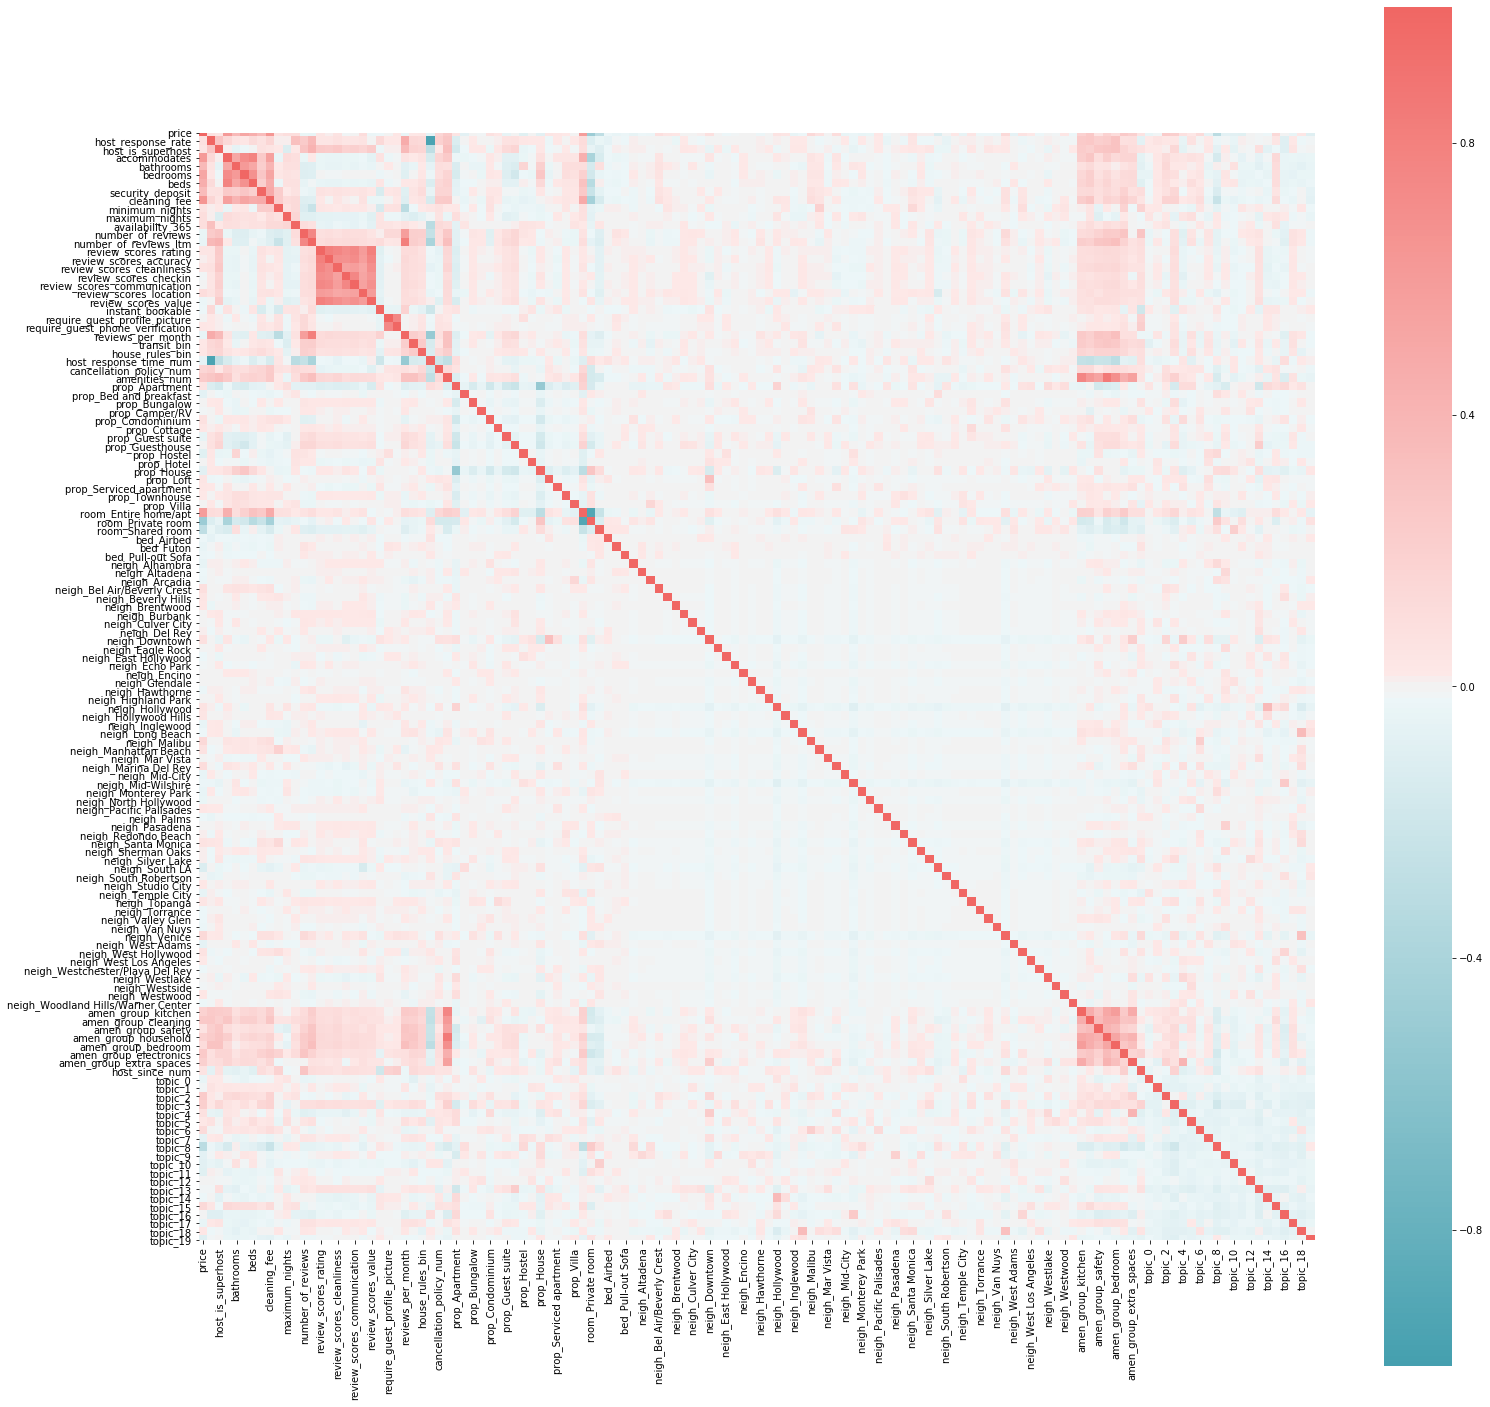

In [948]:
# Look at a heatmap of the target and feature matrix
# Identify potential multicollinearities between features
plt.figure(figsize=(25,25))
sns.heatmap(pd.concat([y,X],axis=1).corr(),
            cmap=bnb_cmap,
            annot=False,
            vmin=-1,
            vmax=1,
            square=True);

There is collinearity between features. Lasso regularization may deal with this, otherwise we will deal with it manually

### Train test split
80% to train and validate the model and 20% to test the final model

In [1392]:
# Set intercept column to a nonzero value
X['intercept'] = 1

In [1393]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=47)

### Standardize the feature data

All features are standardized using a standard scaler, which forces the column to have a mean = 0 and a standard deviation = 1, resulting in a z-score in place of each value. While both the training and testing data are scaled, the actual scaler is fit only on the training data to avoid bleeding any information from the testing data.

In [1395]:
# Set aside categorical columns that don't have to be scaled
X_train_cat = X_train[X_cat_cols]
X_test_cat = X_test[X_cat_cols]
# X_train_scaled[X_num_cols] = scaler.fit_transform(X_train[X_num_cols].values)

In [1396]:
# Scale numerical columns
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[X_num_cols].values),
                              columns=X_num_cols,index=X_train.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test[X_num_cols].values), columns=X_num_cols,index=X_test.index)


In [1397]:
# Merge the df's back together
X_train_scaled = X_train_num_scaled.merge(X_train_cat,left_index=True,right_index=True)
X_test_scaled = X_test_num_scaled.merge(X_test_cat,left_index=True,right_index=True)

In [1343]:
# Save training  for later
with open('data/X_train_scaled_lax.pickle', 'wb') as to_write:
    pickle.dump(X_train_scaled, to_write)

### Helper Functions & Variables
Set up functions to be used in evaluating all functions

In [611]:
def adj_r2(r2, feat_data):
    '''
    Calculates the adjusted R-squared value (float)
    for a linear regression model
    ---
    Inputs:
    -r2(float)
    -feature dataset (np.array or dataframe)
    '''
    num_features = feat_data.shape[1]
    num_data = feat_data.shape[0]
    temp = (1 - r2) * (num_data - 1)
    temp = temp / (num_data - num_features - 1)
    temp = 1 - temp
    return temp

In [612]:
def calc_mae_rmse(df):
    """
    Calculates and prints the mean absolute error and
    root mean squared error for a model given its
    actual target data and predicted target data
    ---
    input: dataframe with 'y_test' as first column,
        'y_pred' as second column
    output: mae(float), rmse(float)
    """

    print('Mean Absolute Error')
    mae = mean_absolute_error(df['y_test'], df['y_pred'])
    print(mae)
    print('Root Mean Squared Error')
    rmse = np.sqrt(mean_squared_error(df['y_test'], df['y_pred']))
    print(rmse)
    return mae, rmse

In [613]:
# Define splits for cross validating each model
kf = KFold(n_splits=5, shuffle=True, random_state=40)

### Ordinary Least Squares with statsmodel - inspect summary stats

First try an Ordinary Least Squares linear regression model

Use the statsmodel package to get a full list of summary statistics for the mdoel

In [1398]:
# Build a linreg model with statsmodel
lsm = sm.OLS(list(y_train), X_train_scaled)

lm_fit = lsm.fit()

print(lm_fit.summary().as_csv(), file=open("simpleOLS_summary.txt", "a"))
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.189e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        19:37:44   Log-Likelihood:                         -5955.0
No. Observations:               11617   AIC:                                  1.217e+04
Df Residuals:                   11487   BIC:                                  1.313e+04
Df Model:                         130                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
host_response_rate                     0.0092      0.013      0.703      0.482      -0.016       0.035
accommodates                           0.1225      0.008     16.294      0.000       0.108       0.137
bathrooms                              0.0455      0.005      8.503      0.000       0.035       0.056
bedrooms                               0.1181      0.007     17.563      0.000       0.105       0.131
beds                                  -0.0068      0.007     -1.051      0.293      -0.020       0.006
security_deposit                       0.0197      0.004      4.398      0.000       0.011       0.028
cleaning_fee                           0.0804      0.006     13.245      0.000       0.068       0.092
minimum_nights                        -0.0585      0.005    -12.837      0.000      -0.067      -0.050
maximum_nights                        -0.0032      0.004     -0.792      0.428      -0.011       0.005
number_of_reviews                     -0.0077      0.006     -1.182      0.237      -0.020       0.005
number_of_reviews_ltm                 -0.0528      0.008     -6.283      0.000      -0.069      -0.036
review_scores_rating                   0.0300      0.009      3.453      0.001       0.013       0.047
review_scores_accuracy                -0.0084      0.007     -1.190      0.234      -0.022       0.005
review_scores_cleanliness              0.0352      0.006      5.710      0.000       0.023       0.047
review_scores_checkin                 -0.0223      0.006     -3.531      0.000      -0.035      -0.010
review_scores_communication            0.0062      0.007      0.909      0.363      -0.007       0.020
review_scores_location                 0.0245      0.005      4.704      0.000       0.014       0.035
review_scores_value                   -0.0506      0.007     -6.942      0.000      -0.065      -0.036
reviews_per_month                     -0.0266      0.008     -3.532      0.000      -0.041      -0.012
host_response_time_num                 0.0289      0.013      2.143      0.032       0.002       0.055
cancellation_policy_num               -0.0125      0.004     -3.024      0.003      -0.021      -0.004
amenities_num                          0.0439      0.016      2.818      0.005       0.013       0.074
host_since_num                        -0.0045      0.004     -1.009      0.313      -0.013       0.004
availability_365                       0.0537      0.004     12.667      0.000       0.045       0.062
topic_0                               -0.0129      0.004     -3.427      0.001      -0.020      -0.006
topic_1                               -0.0099      0.004     -2.652      0.008      -0.017      -0.0

#### Multicollinearity

It is a good idea to run an additional check for multicollinearity between features. Calculate the Variance Inflation Factor to identify which features might be collinear 

In [955]:
vif = pd.DataFrame()
vif["VIF Factor"] = [
    variance_inflation_factor(X_train_scaled.values, i)
    for i in range(X_train_scaled.shape[1])
]
vif["features"] = X_train_scaled.columns

/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [956]:
print(vif, file=open("vif.txt", "a"))
vif.sort_values(by='VIF Factor',ascending=False)[0:50]

,VIF Factor,features
118,inf,topic_7
122,inf,topic_11
130,inf,topic_19
129,inf,topic_18
128,inf,topic_17
127,inf,topic_16
119,inf,topic_8
126,inf,topic_15
124,inf,topic_13
123,inf,topic_12


There are some features with a high VIF factor indicating multicollinearity that will be handled either manually or with regularization

## Drop Collinear Columns

In [1399]:
del X_train_scaled['bedrooms']
del X_test_scaled['bedrooms']
del X_train_scaled['beds']
del X_test_scaled['beds']
del X_train_scaled['number_of_reviews_ltm']
del X_test_scaled['number_of_reviews_ltm']
del X_train_scaled['review_scores_communication']
del X_test_scaled['review_scores_communication']
del X_train_scaled['review_scores_accuracy']
del X_test_scaled['review_scores_accuracy']
del X_train_scaled['review_scores_checkin']
del X_test_scaled['review_scores_checkin']
del X_train_scaled['review_scores_location']
del X_test_scaled['review_scores_location']
del X_train_scaled['review_scores_cleanliness']
del X_test_scaled['review_scores_cleanliness']
del X_train_scaled['require_guest_profile_picture']
del X_test_scaled['require_guest_profile_picture']
del X_train_scaled['host_response_time_num']
del X_test_scaled['host_response_time_num']

## OLS with Transformed Target in SciKit Learn
Repeat the model done above using the SciKit tools, which are also used for the other models considered in this notebook

The scoring metric used to compare models is R^2, which measures the strength of the relationship between the model and the target variable

Use cross-validation with 10 splits to get a more accurate R^2 score that will be less influenced by random chance in the validation/test split process

In [1267]:
lm = LinearRegression()  # Instantiate model
lm.fit(X_train_scaled, y_train);
# Fit model to the training data

In [1268]:
# Look at the coefficients
print('OLS Linear Regression Model Coefficients')
sorted(list(zip(X_train_scaled.columns, lm.coef_)),key=(lambda x: x[1]))

OLS Linear Regression Model Coefficients


[('prop_Hostel', -0.43446331727059856),
 ('room_Shared room', -0.4140521081255745),
 ('prop_Camper/RV', -0.340472250256055),
 ('prop_Bed and breakfast', -0.25401347186380796),
 ('prop_Guest suite', -0.23487793110949126),
 ('prop_Guesthouse', -0.1872702377216447),
 ('prop_Apartment', -0.1832705925307344),
 ('bed_Pull-out Sofa', -0.16676963236788211),
 ('prop_Townhouse', -0.15012222179012627),
 ('prop_Bungalow', -0.14954438760673472),
 ('prop_Villa', -0.14067403535128098),
 ('prop_House', -0.12270273906826305),
 ('prop_Loft', -0.11665013711907156),
 ('prop_Cottage', -0.11097331934328025),
 ('prop_Serviced apartment', -0.09986561294001728),
 ('prop_Condominium', -0.09642586348934723),
 ('bed_Futon', -0.08172455127813205),
 ('minimum_nights', -0.056113613817373696),
 ('neigh_Alhambra', -0.04988269439220176),
 ('neigh_Temple City', -0.0469327361525848),
 ('neigh_South LA', -0.04693028229081041),
 ('reviews_per_month', -0.04421951961986843),
 ('review_scores_value', -0.030506033158288273),
 ('neigh_Monterey Park', -0.028494999984350892),
 ('amen_group_kitchen', -0.025919601470418427),
 ('instant_bookable', -0.02199847758247099),
 ('transit_bin', -0.02089652595297696),
 ('number_of_reviews', -0.018880474378850903),
 ('cancellation_policy_num', -0.018002209857379756),
 ('neigh_West Adams', -0.017099923841994935),
 ('host_response_rate', -0.017022932422179372),
 ('amen_group_bedroom', -0.013989357889121562),
 ('amen_group_household', -0.011112070072055294),
 ('neigh_Altadena', -0.009520725445172564),
 ('neigh_Encino', -0.007635913519967981),
 ('amen_group_safety', -0.005344317684661003),
 ('neigh_Valley Glen', -0.0046587706652933235),
 ('host_since_num', -0.00420548216954373),
 ('maximum_nights', -0.002039806643351988),
 ('intercept', -1.6391277313232422e-06),
 ('house_rules_bin', 0.0011262842846682733),
 ('neigh_Van Nuys', 0.005031756755744958),
 ('amen_group_cleaning', 0.00671496461740808),
 ('amen_group_electronics', 0.010432812058664673),
 ('host_is_superhost', 0.011103284236215413),
 ('neigh_Hawthorne', 0.02163159739326277),
 ('amen_group_extra_spaces', 0.021852395196322427),
 ('security_deposit', 0.022816145259225373),
 ('require_guest_phone_verification', 0.03518659306598813),
 ('amenities_num', 0.03807305601283717),
 ('availability_365', 0.0429101646053692),
 ('review_scores_rating', 0.0438528512580697),
 ('neigh_Inglewood', 0.05051554501487136),
 ('neigh_East Hollywood', 0.05307890587269398),
 ('neigh_Highland Park', 0.0535776095870627),
 ('neigh_Long Beach', 0.06182045284750186),
 ('neigh_North Hollywood', 0.06229123628819),
 ('neigh_Arcadia', 0.06268097906898996),
 ('neigh_Eagle Rock', 0.0715460252982755),
 ('neigh_Woodland Hills/Warner Center', 0.07529005392223373),
 ('bathrooms', 0.0769874229030504),
 ('neigh_Mid-City', 0.07875023269060098),
 ('neigh_Burbank', 0.08399355492398486),
 ('bed_Airbed', 0.08651945798333552),
 ('neigh_Sherman Oaks', 0.09402953595874952),
 ('neigh_Palms', 0.09499204471535908),
 ('cleaning_fee', 0.11485829351844054),
 ('neigh_Torrance', 0.11519687095493067),
 ('neigh_Westlake', 0.11737859313177265),
 ('neigh_Westside', 0.12504369765095114),
 ('neigh_Silver Lake', 0.1264376662888117),
 ('neigh_Mid-Wilshire', 0.12948699197535124),
 ('neigh_Culver City', 0.1364424835084691),
 ('neigh_Echo Park', 0.14481003981095839),
 ('neigh_Glendale', 0.1479031759797228),
 ('neigh_Westchester/Playa Del Rey', 0.15701566093625752),
 ('neigh_South Robertson', 0.16434698983080562),
 ('accommodates', 0.17036052711331803),
 ('room_Private room', 0.1808317383621386),
 ('neigh_Mar Vista', 0.202937478001458),
 ('neigh_Hollywood', 0.21097960860667755),
 ('neigh_Pasadena', 0.21722264025130014),
 ('neigh_Downtown', 0.2236328098126655),
 ('neigh_Studio City', 0.22554843433465765),
 ('neigh_Del Rey', 0.24054967255830517),
 ('neigh_West Los Angeles', 0.2442167459996509),
 ('neigh_Topanga', 0.2639068374548797),
 ('neigh_Redondo Beach', 0.27535815107797557),
 ('neigh_Hollywood Hills', 0.27780076804264164),
 ('neigh_West Hollywood', 

In [1269]:
# Calculate R-squared using cross-validation
r2_lm = np.mean(
    cross_val_score(lm, X_train_scaled, y_train, cv=kf, scoring='r2'))
print('OLS Linear Regression model R^2 on in-sample data: {:f}'.format(r2_lm))

OLS Linear Regression model R^2 on in-sample data: 0.694779


In [1271]:
# Get vector of predicted target values by feeding the
# test feature data through the trained model
y_pred_lm = lm.predict(X_test_scaled)

In [1272]:
print('OLS model R^2 on out-of-sample data: {:f}'.format(
    lm.score(X_test_scaled, y_test)))

OLS model R^2 on out-of-sample data: 0.705280


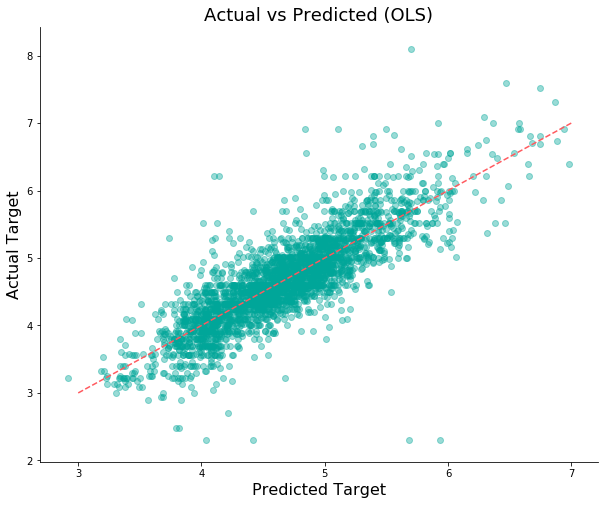

In [1273]:
# Plot actual vs predicted
plt.figure(figsize=(10, 8))
plt.plot([3, 7], [3, 7], '--', c=bnb_red)
plt.scatter(y_pred_lm, y_test, color=bnb_blue, alpha=0.4)
plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
sns.despine()
plt.ylabel('Actual Target', size=16)
plt.xlabel('Predicted Target', size=16)
plt.title('Actual vs Predicted (OLS)', size=18)
plt.savefig('img/lm_ycompare_bc.png')

The red line represents a perfect model (y_intercept at 0, slope of 1, y_predicted = y_actual). This is a good visual representation of how closely the model predicts the target based on the test features

In [1274]:
resid_lm = y_test - y_pred_lm  # Calculate residuals

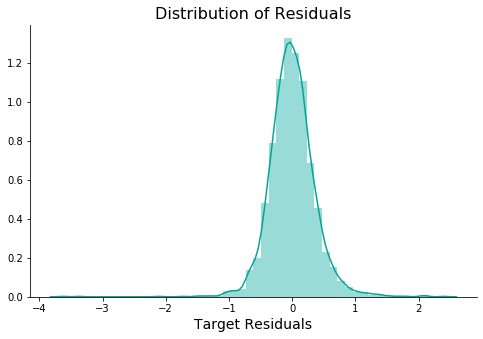

In [1275]:
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(resid_lm,color=bnb_blue)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Residuals', size=16)
plt.savefig('img/resid_dist.png')

## Linear Regression with Polynomial Features

Polynomial Regression is an effective tool in feature engineering. It can identify features that should be transformed to a higher degree or potentially important feature interactions

In [ ]:
degree = 2

poly = PolynomialFeatures(degree=degree)

# Fit polynomial features and transform on training data
X_train_scaled_poly = poly.fit_transform(X_train_scaled.values)

# Transform test data
X_test_scaled_poly = poly.transform(X_test_scaled.values)

# Instantiate polynomial features with linear regression
# and fit to training data
lm_poly = LinearRegression()
lm_poly.fit(X_train_scaled_poly, y_train)

In [259]:
# Calculate R^2 and Adjusted R^2 for the model with polynomial features
r2_poly = np.mean(
    cross_val_score(lm_poly, X_train_scaled_poly, y_train, cv=kf, scoring='r2'))
print('Degree 2 polynomial R^2 on in-sample data: {:f}'.format(r2_poly))

adj_r2_poly = adj_r2(r2_poly, X_train_scaled_poly)
print('Degree 2 polynomial adjusted_R^2 on in-sample data: {:f}'.format(
    adj_r2_poly))

Degree 2 polynomial R^2 on in-sample data: -11900715702928244736.000000
Degree 2 polynomial adjusted_R^2 on in-sample data: -19861884138680242176.000000


In [263]:
cross_val_score(lm_poly, X_train_scaled_poly, y_train, cv=kf, scoring='r2')

array([-1.09657665e+19, -6.69274907e+18, -1.85259907e+19, -2.33147330e+19,
       -4.33919709e+15])

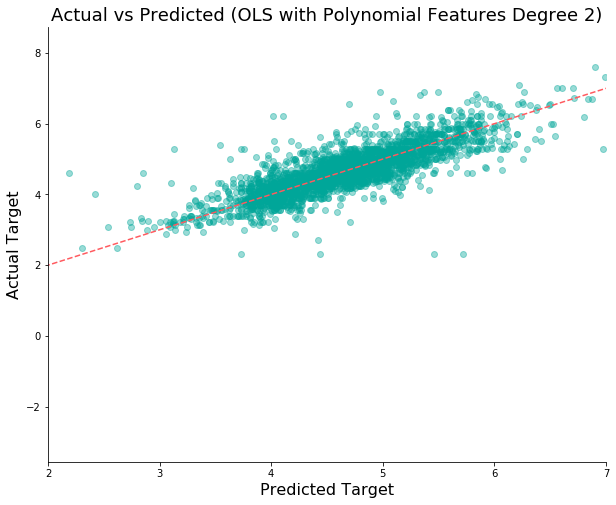

In [260]:
y_pred_poly = lm_poly.predict(X_test_scaled_poly)

# Plot actual vs predicted
plt.figure(figsize=(10, 8))
plt.xlim((2,7))
plt.plot([-3, 7], [-3, 7], '--', c=bnb_red)
plt.scatter(y_pred_poly, y_test, color=bnb_blue, alpha=0.4)
plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
sns.despine()
plt.ylabel('Actual Target', size=16)
plt.xlabel('Predicted Target', size=16)
plt.title('Actual vs Predicted (OLS with Polynomial Features Degree 2)', size=18)
plt.savefig('img/lm_poly_ycompare.png')


Polynomial features does not improve the model by much. We may return to this later on to see if any of the generated features improve performance significantly while others bring it down

## Regularization
Cross validation is used to determine the best value of alpha which minimizes the cost function in each regularization model. Set up an array of candidate values for alpha

In [970]:
# Set up alpha candidate values for regularization models
# Alpha is the hyperparameter that controls how
# heavily features are penalized for high coefficients
param_grid = {'alpha': 10**np.linspace(-3, 3, 600)}

### LASSO
Use LASSO to see if any features should be eliminated to further simplify the model by "punishing" features for having high coefficients and helps avoid over-fitting.

In [971]:
# Instantiate the LASSO model
my_grid_search = GridSearchCV(Lasso(),
                              param_grid,
                              cv=kf,
                              n_jobs=-1,
                              scoring='r2')

In [972]:
# Fit the model to the scaled training data
my_grid_search.fit(X_train_scaled, y_train)
lasso_gridcv_model = my_grid_search.best_estimator_

In [973]:
# Use model to predict target values on the testing data
y_pred_lasso = lasso_gridcv_model.predict(X_test_scaled)

In [974]:
print('LASSO Model Alpha = {:f}'.format(lasso_gridcv_model.alpha))

LASSO Model Alpha = 0.001000


In [975]:
# Evaluate performance metrics
print('LASSO model R^2 on in-sample data: {:f}'.format(
    lasso_gridcv_model.score(X_train_scaled, y_train)))
print('LASSO model R^2 on out-of-sample data: {:f}'.format(
    lasso_gridcv_model.score(X_test_scaled, y_test)))

LASSO model R^2 on in-sample data: 0.702022
LASSO model R^2 on out-of-sample data: 0.704318


In [976]:
resid_lasso = y_test - y_pred_lasso  # Calculate residuals for LASSO model

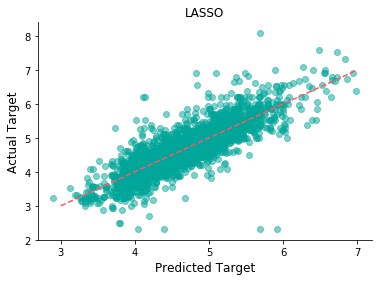

In [977]:
# Plot the predicted values vs the actual target values
plt.scatter(y_pred_lasso, y_test, color=bnb_blue, alpha=0.5)
plt.plot([3,7], [3, 7], '--', c=bnb_red)
sns.despine()
plt.ylabel('Actual Target', size=12)
plt.xlabel('Predicted Target', size=12)
plt.title('LASSO')
plt.savefig('img/lasso_ycompare.png')

In [978]:
sorted(list(zip(X_train_scaled.columns,lasso_gridcv_model.coef_)),key=lambda x: x[1])

[('room_Shared room', -0.09745127985016189),
 ('minimum_nights', -0.05370915292087741),
 ('topic_8', -0.04646785966787502),
 ('reviews_per_month', -0.04395079432222068),
 ('prop_Hostel', -0.027556802842250587),
 ('review_scores_value', -0.025393199344765853),
 ('prop_Guest suite', -0.02365419089092953),
 ('prop_Apartment', -0.0228347435879915),
 ('topic_9', -0.017407492557331653),
 ('amen_group_kitchen', -0.017082871749743093),
 ('cancellation_policy_num', -0.016489477209389154),
 ('host_response_rate', -0.016481509006682174),
 ('topic_10', -0.015173505783433579),
 ('topic_0', -0.015020927671187788),
 ('number_of_reviews', -0.014694864132646163),
 ('prop_Guesthouse', -0.014560310003459476),
 ('prop_Camper/RV', -0.013149670284705445),
 ('neigh_South LA', -0.012150319306966138),
 ('topic_19', -0.011930692332833637),
 ('topic_11', -0.011902926126701272),
 ('prop_Bed and breakfast', -0.011367126217392824),
 ('topic_1', -0.010965858249010899),
 ('instant_bookable', -0.010404812338993537),
 

### Ridge

Ridge helps identify collinearity of features and can smooth out results

In [756]:
# Instantiate Ridge model
my_grid_search = GridSearchCV(Ridge(),
                              param_grid,
                              cv=kf,
                              n_jobs=-1,
                              scoring='r2')

In [757]:
my_grid_search.fit(X_train_scaled, y_train);

In [758]:
ridge_gridcv_model = my_grid_search.best_estimator_

In [759]:
print('Ridge Model Alpha = {:f}'.format(ridge_gridcv_model.alpha))

Ridge Model Alpha = 24.964845


In [760]:
# Predict target values from test feature data for Ridge model
y_pred_ridge = ridge_gridcv_model.predict(X_test_scaled)

In [761]:
print('Ridge model on in-sample data R^2: {:f}'.format(
    ridge_gridcv_model.score(X_train_scaled, y_train)))
print('Ridge model on out-of-sample data R^2: {:f}'.format(
    ridge_gridcv_model.score(X_test_scaled, y_test)))

Ridge model on in-sample data R^2: 0.715177
Ridge model on out-of-sample data R^2: 0.713909


In [768]:
sorted(list(zip(X_train_scaled.columns,ridge_gridcv_model.coef_)),key=lambda x: x[1])

[('room_Shared room', -0.08401915485634237),
 ('prop_Apartment', -0.07124294125586439),
 ('minimum_nights', -0.052166711711726696),
 ('topic_8', -0.040498955935225935),
 ('reviews_per_month', -0.039817385953303405),
 ('prop_Guest suite', -0.038010666811188296),
 ('prop_Guesthouse', -0.034470770341340815),
 ('prop_House', -0.03393412458615431),
 ('review_scores_value', -0.03016794380486766),
 ('prop_Hostel', -0.029968043661519193),
 ('amen_Microwave', -0.028568456035728208),
 ('amen_Self check-in', -0.02486636081452222),
 ('prop_Camper/RV', -0.020056274158707414),
 ('amen_Internet', -0.019422010271986853),
 ('topic_0', -0.018799827268537427),
 ('prop_Condominium', -0.018229709379506052),
 ('cancellation_policy_num', -0.017884502797264102),
 ('amen_Hot water', -0.01765236573251867),
 ('prop_Bungalow', -0.01698232236987577),
 ('prop_Townhouse', -0.016774009097396837),
 ('amen_Wifi', -0.01651064543481289),
 ('host_response_rate', -0.01567420905840349),
 ('topic_9', -0.014077926436900636),


### Elastic Net

Elastic net combines the cost functions of a Ridge and LASSO model. Using cross-validation, the model is optimized to the best alpha value and the best l1_ratio(the weights given to LASSO vs Ridge) to minimize the cost function

In [762]:
# Instantiate and train Elastic Net model
param_grid = {
    'alpha': 10**np.linspace(-3, 3, 600),
    'l1_ratio': np.linspace(0.1, 1, num=10)
}
elas_model = GridSearchCV(ElasticNet(),
                          param_grid,
                          cv=kf,
                          n_jobs=-1,
                          scoring='r2')
elas_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=40, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00...
       7.07537695e+02, 7.24046198e+02, 7.40939882e+02, 7.58227735e+02,
       7.75918954e+02, 7.94022950e+02, 8.12549354e+02, 8.31508023e+02,
       8.50909042e+02, 8.70762732e+02, 8.91079654e+02, 9.11870618e+02,
       9.33146683e+02, 9.54919168e+02, 9.77199656e+02, 1.00000000e+03]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return

In [763]:
elas_model_cv = elas_model.best_estimator_

In [764]:
# Predict target values based on test feature data for Elastic Net Model
y_pred_elas = elas_model_cv.predict(X_test_scaled)

In [765]:
# Look at optimized model parameters
print('l1 ratio = ', elas_model_cv.l1_ratio)  # l1 ratio
print('alpha = {:f}'.format(elas_model_cv.alpha))  # alpha

l1 ratio =  0.1
alpha = 0.004376


In [766]:
# Evaluate model performance
print('Elastic Net model on in-sample data R^2: {:f}'.format(
    elas_model_cv.score(X_train_scaled, y_train)))
print('Elastic Net model on out-of-sample data R^2: {:f}'.format(
    elas_model_cv.score(X_test_scaled, y_test)))

Elastic Net model on in-sample data R^2: 0.714717
Elastic Net model on out-of-sample data R^2: 0.714038


In [767]:
sorted(list(zip(X_train_scaled.columns,elas_model_cv.coef_)),key=lambda x: x[1])

[('room_Shared room', -0.09439064704382252),
 ('minimum_nights', -0.050845709657782394),
 ('topic_8', -0.03969474519448631),
 ('reviews_per_month', -0.039219591715853264),
 ('prop_Apartment', -0.03162977777332574),
 ('review_scores_value', -0.027933315331291973),
 ('amen_Microwave', -0.027214650986441706),
 ('prop_Hostel', -0.02666871459968807),
 ('amen_Self check-in', -0.02335208043578186),
 ('prop_Guest suite', -0.02042627808903253),
 ('amen_Hot water', -0.01760503693917008),
 ('amen_Internet', -0.017555764565301935),
 ('topic_0', -0.01742360371815519),
 ('cancellation_policy_num', -0.016940229799236137),
 ('amen_Wifi', -0.016387328148507647),
 ('host_response_rate', -0.015057682285341042),
 ('prop_Camper/RV', -0.01465762690564855),
 ('instant_bookable', -0.013541002004377552),
 ('prop_Guesthouse', -0.013183258601814721),
 ('topic_9', -0.01276786062481069),
 ('amen_Free street parking', -0.012522432182254508),
 ('amen_Laptop friendly workspace', -0.011725582710757427),
 ('amen_Safety

## XGBoost
Try using XGBoost to predict price. Often this performs better than traditional linear regression, but the results are more difficult to interpret. This may not be worth the tradeoff in this case, where interpretability is important for Airbnb hosts in understanding price suggestions

In [591]:
# Instantiate model
xgb = XGBRegressor()
# Fit to data
xgb.fit(X_train_scaled, y_train)
# Get predictions
training_preds_xgb = xgb.predict(X_train_scaled)
val_preds_xgb = xgb.predict(X_test_scaled)

/anaconda3/envs/metis/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:28:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [592]:
# Evaluate the model
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb),4))


Training MSE: 0.1177
Validation MSE: 0.1284

Training r2: 0.7396
Validation r2: 0.7174


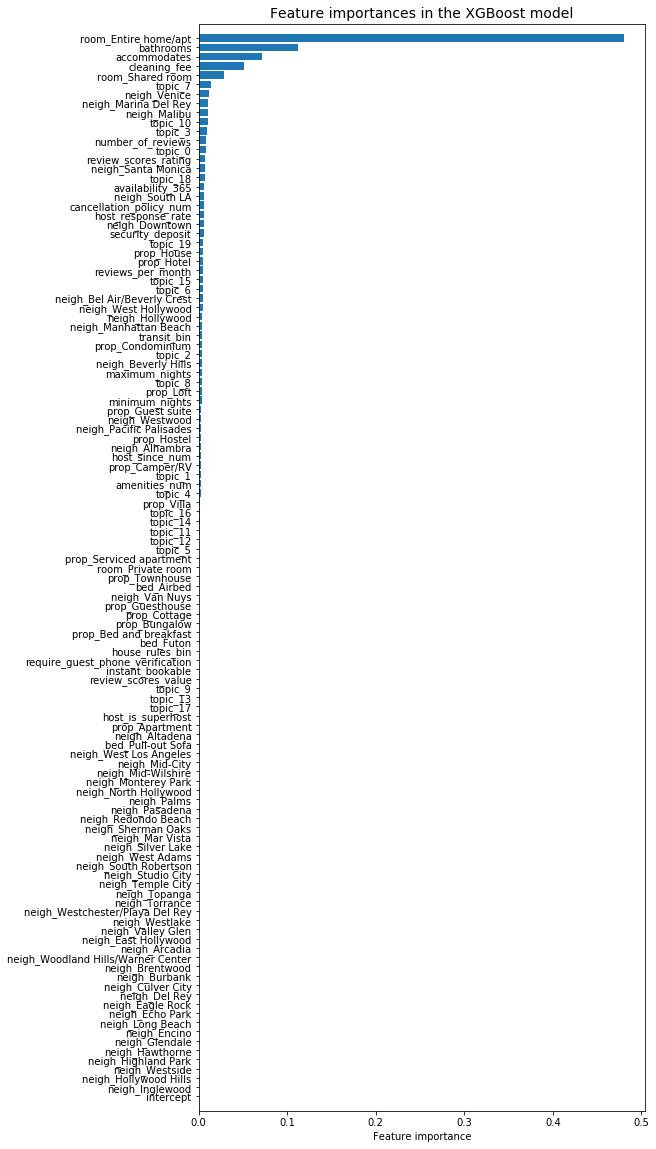

In [593]:
# Producing a dataframe of feature importances
ft_weights_xgb = pd.DataFrame(xgb.feature_importances_, columns=['weight'], index=X_train_scaled.columns)
ft_weights_xgb.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb.index, ft_weights_xgb.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### GridSearch XGBoost
(Uncomment below if running for the first time)
<br>
Try to improve the performance of XGBoost on all data using GridSearch to tune hyperparameters

In [357]:
# Set up parameters to tune
xgb_param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1],
    'n_estimators': [500],
    'colsample_bytree':[0.5,0.75],
    'colsample_bylevel':[0.25,0.5],
    'reg_alpha':[0.7,0.9],
    'reg_lambda':[0.1,0.3]
    
}
# xgb_gridsearch = GridSearchCV(XGBRegressor(),
#                           xgb_param_grid,
#                           cv=kf,
#                           n_jobs=-1,
#                           scoring='r2')
# xgb_gridsearch.fit(X_train_scaled, y_train)

/anaconda3/envs/metis/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=40, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bylevel': [0.25, 0.5],
                         'colsample_bytree': [0.5, 0.75],
                         'learning_rate': [0.1], 'max_depth': [5, 7, 9],
                 

In [358]:
# xgb_model_cv = xgb_gridsearch.best_estimator_

In [359]:
# xgb_model_cv

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.25,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.3, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [360]:
# Save for later
# pickle.dump(xgb_model_cv, open("xgb_tuned_lax2.pkl", "wb"))

In [376]:
# Load gridsearched model
with open('xgb_tuned_lax2.pkl', 'rb') as to_read:
    xgb_model_cv = pickle.load(to_read)

[11:59:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [377]:
# Predict target values based on test feature data for Elastic Net Model
y_pred_xgb_grid = xgb_model_cv.predict(X_test_scaled)

In [363]:
# Evaluate model performance
print('Grid Search XGBoost model on in-sample data R^2: {:f}'.format(
    xgb_model_cv.score(X_train_scaled, y_train)))
print('Grid Search XGBoost model on out-of-sample data R^2: {:f}'.format(
    xgb_model_cv.score(X_test_scaled, y_test)))

Grid Search XGBoost model on in-sample data R^2: 0.900750
Grid Search XGBoost model on out-of-sample data R^2: 0.751336


While it appears that the tuned model is overfit on the data, it still improves model performance on unseen data

## Feature Selection 
Based on the results of XGBoost with regularization and Linear Regression with LASSO/Ridge/Elastic Net regularization, eliminate features and rerun the models to make sure performance does not degrade.


We also want to focus on eliminating features that are largely out of the control of Airbnb hosts or may not be available to new hosts (rating, for example)

In [1520]:
# Columns to eliminate from model
sel_cols_to_drop = [
    'host_is_superhost', 'require_guest_phone_verification',
    'reviews_per_month', 'host_since_num', 'house_rules_bin', 'transit_bin',
    'review_scores_value', 'instant_bookable', 'cancellation_policy_num',
    'host_response_rate', 'number_of_reviews', 'bed_Airbed', 'bed_Futon',
    'bed_Pull-out Sofa', 'maximum_nights', 'amenities_num', 'neigh_Torrance',
    'neigh_Westside', 'neigh_Silver Lake', 'neigh_Culver City',
    'neigh_South Robertson', 'neigh_Westlake',
    'neigh_Westchester/Playa Del Rey', 'neigh_Temple City',
    'neigh_Monterey Park', 'neigh_West Adams', 'neigh_Valley Glen',
    'neigh_Altadena', 'neigh_Encino', 'neigh_Van Nuys', 'neigh_Hawthorne',
    'neigh_East Hollywood', 'neigh_Highland Park', 'neigh_Arcadia',
    'neigh_Inglewood', 'neigh_Eagle Rock', 'neigh_Palms', 'neigh_Glendale',
    'neigh_Studio City', 'neigh_Woodland Hills/Warner Center',
    'neigh_Mar Vista', 'neigh_Sherman Oaks', 'neigh_Hollywood Hills',
    'neigh_Del Rey', 'neigh_North Hollywood', 'neigh_Burbank',
    'neigh_Mid-Wilshire', 'neigh_Echo Park', 'neigh_Mid-City',
    'neigh_Long Beach', 'neigh_Alhambra', 'neigh_Topanga',
    'neigh_Redondo Beach', 'neigh_Pasadena', 'neigh_Brentwood',
    'prop_Serviced apartment', 'prop_Cottage', 'prop_Loft', 'prop_Villa',
    'prop_Bungalow', 'prop_Townhouse', 'prop_Condominium', 'prop_Guesthouse',
    'prop_House', 'topic_4', 'topic_5', 'topic_16', 'topic_12', 'topic_13',
    'topic_1', 'topic_17', 'topic_7', 'topic_15', 'topic_14', 'topic_18',
    'topic_6', 'topic_10', 'topic_11', 'topic_0', 'topic_19',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_safety',
    'amen_group_kitchen','amen_group_extra_spaces'
]

```
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.25,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.3, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
             ```

In [1521]:
# Try dropping one column at a time and then all of them if none have significant impact on performance
X_train_scaled_sel = X_train_scaled.drop(
    columns=sel_cols_to_drop)
X_test_scaled_sel = X_test_scaled.drop(
    columns=sel_cols_to_drop)

In [1586]:
# Reorder columns
cols_sel_order = [
    'accommodates', 'bathrooms', 'security_deposit', 'cleaning_fee',
    'minimum_nights', 'review_scores_rating', 'availability_365', 'topic_2',
    'topic_3', 'topic_8', 'topic_9', 'amen_group_cleaning',
    'amen_group_electronics', 'neigh_Downtown', 'neigh_Bel Air/Beverly Crest',
    'neigh_Malibu', 'neigh_Venice', 'neigh_West Hollywood',
    'neigh_West Los Angeles', 'neigh_South LA', 'neigh_Manhattan Beach',
    'neigh_Hollywood', 'neigh_Beverly Hills', 'neigh_Santa Monica',
    'neigh_Marina Del Rey', 'neigh_Pacific Palisades', 'neigh_Westwood',
    'room_Entire home/apt', 'room_Private room', 'room_Shared room',
    'prop_Hotel', 'prop_Bed and breakfast', 'prop_Camper/RV',
    'prop_Guest suite', 'prop_Hostel', 'prop_Apartment'
]

In [1587]:
# Apply column reorder to feature matrices
X_test_scaled_sel = X_test_scaled_sel[cols_sel_order]
X_train_scaled_sel = X_train_scaled_sel[cols_sel_order]

## Rerun Models on Selected Features

### Elastic Net

In [1588]:
# Instantiate model with gridsearched parameters
elas_sel = ElasticNet(alpha=0.004376,l1_ratio=0.1)


In [1589]:
# Fit to selected features
elas_sel.fit(X_train_scaled_sel, y_train)

ElasticNet(alpha=0.004376, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1590]:
# Predict target values based on test feature data for Elastic Net Model
y_pred_elas_sel = elas_sel.predict(X_test_scaled_sel)

In [1968]:
# Save test actual and predicted for plotting
pd.DataFrame([list(y_test),list(y_pred_elas_sel),list(y_test)]).transpose().rename(columns={
                   0: 'y_test_actual',
                   1: 'y_test_pred',
        2: 'y_test_actual_copy'
               }).to_csv('data/lr_test_pred.csv')

In [1591]:
# Evaluate model performance
print('Elastic Net model on in-sample data R^2: {:f}'.format(
    elas_sel.score(X_train_scaled_sel, y_train)))
print('Elastic Net model on out-of-sample data R^2: {:f}'.format(
    elas_sel.score(X_test_scaled_sel, y_test)))

Elastic Net model on in-sample data R^2: 0.666768
Elastic Net model on out-of-sample data R^2: 0.671234


In [1951]:
# Evalaute mean absolute error
mean_absolute_error(y_test,y_pred)

18.838841081505052

Performance did not degrade from simplifying the model

## XGBoost

In [1602]:
# Set up test/train set with just the selected columns
X_train_sel = X_train[X_train_scaled_sel.columns]
X_test_sel = X_test[X_test_scaled_sel.columns]

In [1603]:
xgb_sel = XGBRegressor(max_depth=7,
                       n_estimators=500,
                       reg_alpha=0.9,
                       reg_lambda=0.3,
                       colsample_bylevel=0.25,
                       colsample_bytree=0.5, random_state=42)
xgb_sel.fit(X_train_scaled_sel, y_train)
training_preds_xgb_sel = xgb_sel.predict(X_train_scaled_sel)
val_preds_xgb_sel = xgb_sel.predict(X_test_scaled_sel)

/anaconda3/envs/metis/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:00:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1604]:
# Printing the results
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_sel),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_sel),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_sel),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_sel),4))


Training MSE: 0.0473
Validation MSE: 0.1157

Training r2: 0.8953
Validation r2: 0.7453


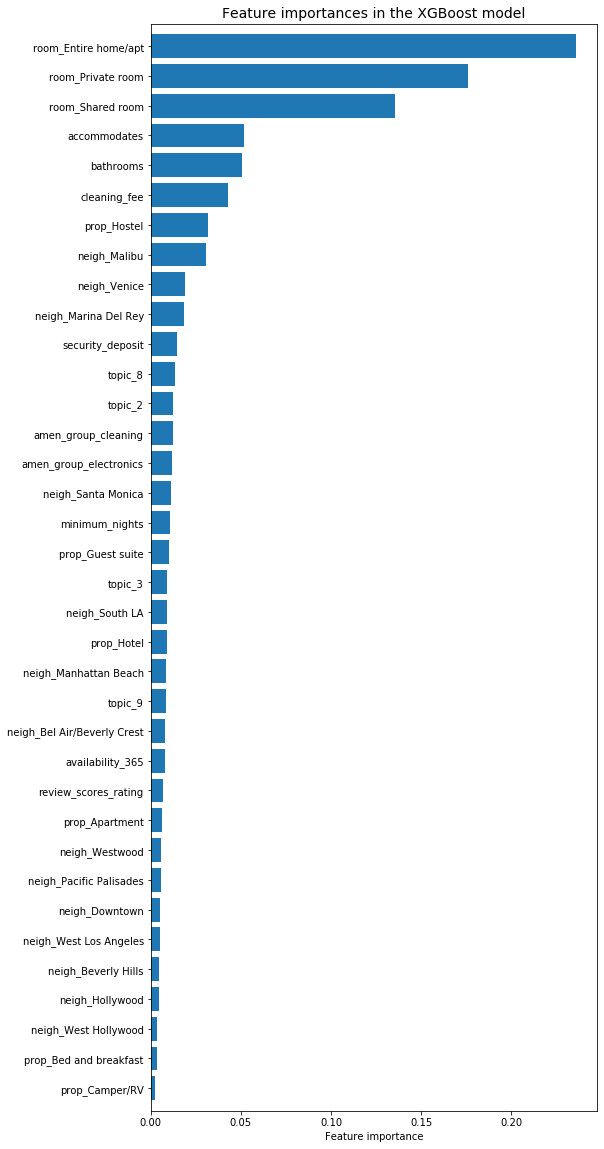

In [1605]:
# Producing a dataframe of feature importances
ft_weights_xgb_sel = pd.DataFrame(xgb_sel.feature_importances_,
                                  columns=['weight'],
                                  index=X_train_scaled_sel.columns)
ft_weights_xgb_sel.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8, 20))
plt.barh(ft_weights_xgb_sel.index, ft_weights_xgb_sel.weight, align='center')
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

**SHAP Values for directionality**

In [1613]:
shap.initjs()
explainer = shap.TreeExplainer(xgb_sel)
shap_values = explainer.shap_values(X_train_scaled_sel)
# shap.summary_plot(shap_values, X_train, plot_type="bar")
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_scaled_sel.iloc[0, :])

In [1614]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_scaled_sel.iloc[0, :])

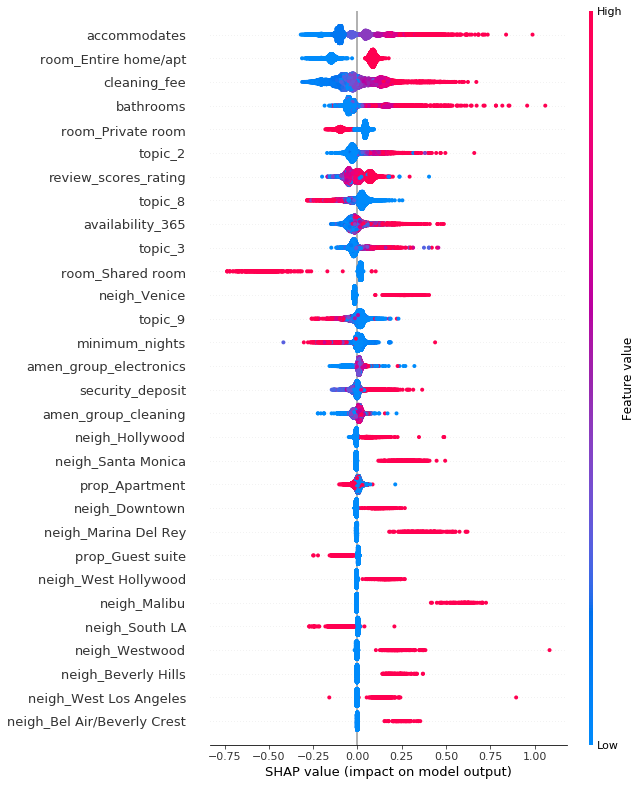

In [1615]:
shap.summary_plot(shap_values, X_train_scaled_sel,max_display=30)

Due to its interpretability, we will move forward with the elastic net model despite the better performance of the xgboost model

## Set Up for Flask App

In [1620]:
# Create an attribute for the feature names
elas_sel.feature_names = X_train_scaled_sel.columns
elas_sel.feature_display_names = [
    'Accommodates', 'Bathrooms', 'Security Deposit', 'Cleaning Fee',
    'Minimum Nights', 'Review Score (Rating)', 'Next Year Availability (Days)',
    'Topic 2 - Luxury/Views', 'Topic 3 - Outdoor Spaces',
    'Topic 8 - Cozy / Good for Families',
    'Topic 9 - Rural / Good for Families', 'Cleaning Amenities',
    'Entertainment Amenities', 'Downtown', 'Bel Air/Beverly Crest', 'Malibu',
    'Venice', 'West Hollywood', 'West LA', 'South LA', 'Manhattan Beach',
    'Hollywood', 'Beverly Hills', 'Santa Monica', 'Marina Del Rey',
    'Pacific Palisades', 'Westwood', 'Entire Home/Apartment', 'Private Room',
    'Shared Room', 'Hotel','Bed and Breakfast','Camper/RV','Guest Suite','Hostel','Apartment'
]

In [1627]:
feats = elas_sel.feature_names

In [1623]:
# Save model
# Pickle this for later
with open("elas_sel.pkl", "wb") as f:
    pickle.dump(elas_sel, f)

In [1652]:
# Recreate scaler for just the selected numerical columns for use in the flask app
scaler_sel = StandardScaler()
scaler_sel.fit(X_train[X_train_scaled_sel.columns[0:13]]);

with open("scaler_sel_p05.pkl", "wb") as f:
    pickle.dump(scaler_sel, f)

## Sandbox: Model on Clustered Data
Everything below here is largely unfinished. I had hypothesized that model performance would be enhanced by segmenting the data on critical features. This was true for some but not all segmentations, and the improvements were not significantly large enough to pursue. In future work I would like to explore this more.

### Split on accommodates (1)

#### Accommodates 1 (a)

In [288]:
X1a=X[X['accommodates']==1]
y1a=y[X['accommodates']==1]

In [474]:
# Columns to keep
cols_1a = [
    'bedrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_communication',
    'review_scores_accuracy', 'review_scores_checkin',
    'review_scores_location', 'review_scores_cleanliness',
    'require_guest_profile_picture', 'host_response_time_num',
    'neigh_Valley Glen', 'neigh_Highland Park'
]

In [290]:
X1a = X1a.drop(columns=cols_1a)

In [291]:
X1a_train, X1a_test, y1a_train, y1a_test = train_test_split(X1a,
                                                    y1a,
                                                    test_size=.2,
                                                    random_state=47)

In [292]:
# Scale the data

scaler1a = StandardScaler()

# Fit the scaler using the training data and scale it
X1a_train_scaled = pd.DataFrame(scaler1a.fit_transform(X1a_train.values),
                              columns=X1a.columns)

# Reset intercept column to a nonzero value
X1a_train_scaled['intercept'] = 1

# Scale the test data
X1a_test_scaled = pd.DataFrame(scaler1a.transform(X1a_test.values), columns=X1a.columns)
X1a_test_scaled['intercept'] = 1

In [293]:
# Build a linreg model with statsmodel
lsm1a = sm.OLS(list(y1a_train), X1a_train_scaled)

lm1a_fit = lsm1a.fit()

print(lm1a_fit.summary().as_csv(), file=open("simpleOLS_summary1a.txt", "a"))
lm1a_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     9.014
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.44e-75
Time:                        20:36:56   Log-Likelihood:                -458.86
No. Observations:                 919   AIC:                             1100.
Df Residuals:                     828   BIC:                             1539.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
host_response_rate                    -0.0468      0.020     -2.308      0.021      -0.087      -0.007
host_is_superhost                      0.0232      0.018      1.266      0.206      -0.013       0.059
accommodates                       -2.146e-16   7.89e-17     -2.721      0.007   -3.69e-16   -5.98e-17
bathrooms                             -0.0381      0.018     -2.176      0.030      -0.073      -0.004
security_deposit                       0.0219      0.017      1.271      0.204      -0.012       0.056
cleaning_fee                           0.0371      0.019      1.924      0.055      -0.001       0.075
minimum_nights                        -0.0485      0.018     -2.673      0.008      -0.084      -0.013
maximum_nights                        -0.0127      0.016     -0.814      0.416      -0.043       0.018
availability_365                       0.0271      0.018      1.501      0.134      -0.008       0.062
number_of_reviews                      0.0241      0.020      1.180      0.238      -0.016       0.064
review_scores_rating                   0.0323      0.024      1.356      0.175      -0.014       0.079
review_scores_value                   -0.0083      0.024     -0.347      0.729      -0.055       0.039
instant_bookable                      -0.0179      0.016     -1.114      0.266      -0.050       0.014
require_guest_phone_verification      -0.0094      0.015     -0.607      0.544      -0.040       0.021
reviews_per_month                     -0.0585      0.023     -2.576      0.010      -0.103      -0.014
transit_bin                           -0.0106      0.016     -0.653      0.514      -0.043       0.021
house_rules_bin                       -0.0104      0.016     -0.657      0.511      -0.041       0.021
cancellation_policy_num               -0.0686      0.016     -4.208      0.000      -0.101      -0.037
amenities_num                          0.0538      0.017      3.162      0.002       0.020       0.087
prop_Apartment                         0.1940      0.117      1.654      0.098      -0.036       0.424
prop_Bed and breakfast                 0.0401      0.046      0.872      0.384      -0.050       0.130
prop_Bungalow                          0.0350      0.043      0.817      0.414      -0.049       0.119
prop_Camper/RV                      9.749e-17    2.5e-16      0.390      0.697   -3.94e-16    5.88e-16
prop_Condominium                       0.1459      0.056      2.583      0.010       0.035       0.257
prop_Cottage                        6.772e-17    1.8e-17      3.764      0.000    3.24e-17    1.03e-16
prop_Guest suite                       0.0329      0.042      0.773      0.440      -0.051       0.116
prop_Guesthouse                        0.0304      0.039      0.772      0.440      -0.047      

### Split on minimum nights (2)

#### Minimum nights 3 or more (a)

In [294]:
X2a=X[X['minimum_nights']>=3]
y2a=y[X['minimum_nights']>=3]

In [295]:
# Columns to keep
cols_2a = [
    'bedrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_communication',
    'review_scores_accuracy', 'review_scores_checkin',
    'review_scores_location', 'review_scores_cleanliness',
    'require_guest_profile_picture', 'host_response_time_num'
]

In [296]:
X2a = X2a.drop(columns=cols_2a)

In [297]:
X2a_train, X2a_test, y2a_train, y2a_test = train_test_split(X2a,
                                                    y2a,
                                                    test_size=.2,
                                                    random_state=47)

In [298]:
# Scale the data

scaler2a = StandardScaler()

# Fit the scaler using the training data and scale it
X2a_train_scaled = pd.DataFrame(scaler2a.fit_transform(X2a_train.values),
                              columns=X2a.columns)

# Reset intercept column to a nonzero value
X2a_train_scaled['intercept'] = 1

# Scale the test data
X2a_test_scaled = pd.DataFrame(scaler2a.transform(X2a_test.values), columns=X2a.columns)
X2a_test_scaled['intercept'] = 1

In [299]:
# Build a linreg model with statsmodel
lsm2a = sm.OLS(list(y2a_train), X2a_train_scaled)

lm2a_fit = lsm2a.fit()

print(lm2a_fit.summary().as_csv(), file=open("simpleOLS_summary2a.txt", "a"))
lm2a_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     56.88
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:37:04   Log-Likelihood:                -1277.1
No. Observations:                2469   AIC:                             2742.
Df Residuals:                    2375   BIC:                             3288.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
host_response_rate                    -0.0220      0.010     -2.103      0.036      -0.042      -0.001
host_is_superhost                     -0.0106      0.010     -1.069      0.285      -0.030       0.009
accommodates                           0.1907      0.013     14.618      0.000       0.165       0.216
bathrooms                              0.1428      0.012     11.721      0.000       0.119       0.167
security_deposit                       0.0186      0.010      1.854      0.064      -0.001       0.038
cleaning_fee                           0.1211      0.012     10.068      0.000       0.098       0.145
minimum_nights                        -0.1157      0.011    -10.635      0.000      -0.137      -0.094
maximum_nights                        -0.0110      0.009     -1.236      0.217      -0.029       0.006
availability_365                       0.0722      0.010      7.508      0.000       0.053       0.091
number_of_reviews                     -0.0059      0.012     -0.479      0.632      -0.030       0.018
review_scores_rating                   0.0515      0.013      3.843      0.000       0.025       0.078
review_scores_value                   -0.0361      0.013     -2.681      0.007      -0.063      -0.010
instant_bookable                      -0.0010      0.009     -0.107      0.915      -0.019       0.017
require_guest_phone_verification      -0.0016      0.009     -0.180      0.858      -0.019       0.016
reviews_per_month                     -0.0398      0.014     -2.887      0.004      -0.067      -0.013
transit_bin                           -0.0211      0.009     -2.271      0.023      -0.039      -0.003
house_rules_bin                        0.0045      0.009      0.490      0.624      -0.014       0.023
cancellation_policy_num                0.0060      0.009      0.644      0.520      -0.012       0.024
amenities_num                          0.0228      0.010      2.196      0.028       0.002       0.043
prop_Apartment                        -0.1634      0.074     -2.214      0.027      -0.308      -0.019
prop_Bed and breakfast                -0.0026      0.011     -0.249      0.803      -0.023       0.018
prop_Bungalow                         -0.0630      0.030     -2.095      0.036      -0.122      -0.004
prop_Camper/RV                        -0.0185      0.011     -1.644      0.100      -0.041       0.004
prop_Condominium                      -0.0600      0.043     -1.392      0.164      -0.145       0.025
prop_Cottage                          -0.0147      0.015     -1.009      0.313      -0.043       0.014
prop_Guest suite                      -0.0697      0.033     -2.107      0.035      -0.135      -0.005
prop_Guesthouse                       -0.0744      0.036     -2.050      0.040      -0.146      

**Try XGBoost**

In [300]:
xgb2a = XGBRegressor()
xgb2a.fit(X2a_train_scaled, y2a_train)
training_preds_xgb2a = xgb2a.predict(X2a_train_scaled)
val_preds_xgb2a = xgb2a.predict(X2a_test_scaled)

/anaconda3/envs/metis/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:37:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [301]:
# Printing the results
print("\nTraining MSE:", round(mean_squared_error(y2a_train, training_preds_xgb2a),4))
print("Validation MSE:", round(mean_squared_error(y2a_test, val_preds_xgb2a),4))
print("\nTraining r2:", round(r2_score(y2a_train, training_preds_xgb2a),4))
print("Validation r2:", round(r2_score(y2a_test, val_preds_xgb2a),4))


Training MSE: 0.1305
Validation MSE: 0.1504

Training r2: 0.7545
Validation r2: 0.6791


#### Minimum nights 1 or 2 (b)

In [302]:
X2b=X[X['minimum_nights']<=2]
y2b=y[X['minimum_nights']<=2]

In [303]:
# Columns to keep
cols_2b = [
    'bedrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_communication',
    'review_scores_accuracy', 'review_scores_checkin',
    'review_scores_location', 'review_scores_cleanliness',
    'require_guest_profile_picture', 'host_response_time_num'
]

In [304]:
X2b = X2b.drop(columns=cols_2b)

In [305]:
X2b_train, X2b_test, y2b_train, y2b_test = train_test_split(X2b,
                                                    y2b,
                                                    test_size=.2,
                                                    random_state=47)

In [306]:
# Scale the data

scaler2b = StandardScaler()

# Fit the scaler using the training data and scale it
X2b_train_scaled = pd.DataFrame(scaler2b.fit_transform(X2b_train.values),
                              columns=X2b.columns)

# Reset intercept column to a nonzero value
X2b_train_scaled['intercept'] = 1

# Scale the test data
X2b_test_scaled = pd.DataFrame(scaler2b.transform(X2b_test.values), columns=X2b.columns)
X2b_test_scaled['intercept'] = 1

In [307]:
# Build a linreg model with statsmodel
lsm2b = sm.OLS(list(y2b_train), X2b_train_scaled)

lm2b_fit = lsm2b.fit()

print(lm2b_fit.summary().as_csv(), file=open("simpleOLS_summary2b.txt", "a"))
lm2b_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:37:18   Log-Likelihood:                -3681.8
No. Observations:                9148   AIC:                             7554.
Df Residuals:                    9053   BIC:                             8230.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
host_response_rate                    -0.0180      0.005     -3.615      0.000      -0.028      -0.008
host_is_superhost                      0.0105      0.005      2.294      0.022       0.002       0.019
accommodates                           0.1612      0.006     28.385      0.000       0.150       0.172
bathrooms                              0.0592      0.005     12.133      0.000       0.050       0.069
security_deposit                       0.0201      0.004      4.587      0.000       0.012       0.029
cleaning_fee                           0.1395      0.006     22.924      0.000       0.128       0.151
minimum_nights                         0.0114      0.004      2.789      0.005       0.003       0.019
maximum_nights                        -0.0006      0.004     -0.161      0.872      -0.009       0.007
availability_365                       0.0424      0.004      9.995      0.000       0.034       0.051
number_of_reviews                     -0.0186      0.005     -3.503      0.000      -0.029      -0.008
review_scores_rating                   0.0469      0.007      7.010      0.000       0.034       0.060
review_scores_value                   -0.0296      0.007     -4.405      0.000      -0.043      -0.016
instant_bookable                      -0.0111      0.004     -2.738      0.006      -0.019      -0.003
require_guest_phone_verification       0.0079      0.004      1.981      0.048    8.34e-05       0.016
reviews_per_month                     -0.0486      0.006     -8.432      0.000      -0.060      -0.037
transit_bin                           -0.0120      0.004     -2.851      0.004      -0.020      -0.004
house_rules_bin                       -0.0028      0.004     -0.681      0.496      -0.011       0.005
cancellation_policy_num               -0.0218      0.004     -5.226      0.000      -0.030      -0.014
amenities_num                          0.0333      0.005      7.185      0.000       0.024       0.042
prop_Apartment                        -0.0504      0.029     -1.751      0.080      -0.107       0.006
prop_Bed and breakfast                -0.0073      0.006     -1.304      0.192      -0.018       0.004
prop_Bungalow                         -0.0114      0.011     -1.069      0.285      -0.032       0.010
prop_Camper/RV                        -0.0154      0.006     -2.783      0.005      -0.026      -0.005
prop_Condominium                       0.0054      0.014      0.402      0.688      -0.021       0.032
prop_Cottage                          -0.0032      0.006     -0.549      0.583      -0.015       0.008
prop_Guest suite                      -0.0366      0.014     -2.631      0.009      -0.064      -0.009
prop_Guesthouse                       -0.0319      0.017     -1.935      0.053      -0.064      

**Try XGBoost**

In [308]:
xgb2b = XGBRegressor()
xgb2b.fit(X2b_train_scaled, y2b_train)
training_preds_xgb2b = xgb2b.predict(X2b_train_scaled)
val_preds_xgb2b = xgb2b.predict(X2b_test_scaled)

/anaconda3/envs/metis/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:37:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [309]:
# Printing the results
print("\nTraining MSE:", round(mean_squared_error(y2b_train, training_preds_xgb2b),4))
print("Validation MSE:", round(mean_squared_error(y2b_test, val_preds_xgb2b),4))
print("\nTraining r2:", round(r2_score(y2b_train, training_preds_xgb2b),4))
print("Validation r2:", round(r2_score(y2b_test, val_preds_xgb2b),4))


Training MSE: 0.1139
Validation MSE: 0.1389

Training r2: 0.7339
Validation r2: 0.6638


### Split on accommodates (3)

#### Accommodates 1 (a)

In [1065]:
X1a=X[X['accommodates']==1]
y1a=y[X['accommodates']==1]

In [1066]:
# Columns to keep
cols_1a = [
    'bedrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_communication',
    'review_scores_accuracy', 'review_scores_checkin',
    'review_scores_location', 'review_scores_cleanliness',
    'require_guest_profile_picture', 'host_response_time_num'
]

In [1067]:
X1a = X1a.drop(columns=cols_1a)

In [1068]:
X1a_train, X1a_test, y1a_train, y1a_test = train_test_split(X1a,
                                                    y1a,
                                                    test_size=.2,
                                                    random_state=47)

In [1069]:
# Scale the data

scaler1a = StandardScaler()

# Fit the scaler using the training data and scale it
X1a_train_scaled = pd.DataFrame(scaler1a.fit_transform(X1a_train.values),
                              columns=X1a.columns)

# Reset intercept column to a nonzero value
X1a_train_scaled['intercept'] = 1

# Scale the test data
X1a_test_scaled = pd.DataFrame(scaler1a.transform(X1a_test.values), columns=X1a.columns)
X1a_test_scaled['intercept'] = 1

In [1070]:
# Build a linreg model with statsmodel
lsm1a = sm.OLS(list(y1a_train), X1a_train_scaled)

lm1a_fit = lsm1a.fit()

print(lm1a_fit.summary().as_csv(), file=open("simpleOLS_summary1a.txt", "a"))
lm1a_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.267
Date:                Sun, 01 Dec 2019   Prob (F-statistic):              0.223
Time:                        15:39:17   Log-Likelihood:                -21.785
No. Observations:                 100   AIC:                             171.6
Df Residuals:                      36   BIC:                             338.3
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
host_response_rate                   0.0891      0.118      0.753      0.456      -0.151       0.329
host_is_superhost                   -0.0587      0.090     -0.653      0.518      -0.241       0.124
accommodates                     -7.853e-16   4.23e-16     -1.855      0.072   -1.64e-15    7.34e-17
bathrooms                           -0.0577      0.093     -0.621      0.539      -0.246       0.131
security_deposit                     0.1346      0.156      0.865      0.393      -0.181       0.450
cleaning_fee                        -0.0918      0.177     -0.518      0.608      -0.451       0.268
minimum_nights                      -0.0958      0.101     -0.949      0.349      -0.301       0.109
maximum_nights                       0.0290      0.084      0.344      0.733      -0.142       0.200
availability_365                     0.1023      0.100      1.027      0.311      -0.100       0.304
number_of_reviews                   -0.0939      0.148     -0.632      0.531      -0.395       0.207
review_scores_rating                 0.1271      0.116      1.099      0.279      -0.107       0.362
review_scores_value                  0.0415      0.114      0.363      0.719      -0.190       0.273
instant_bookable                     0.0901      0.097      0.934      0.357      -0.106       0.286
require_guest_phone_verification    -0.0183      0.088     -0.208      0.837      -0.197       0.160
reviews_per_month                   -0.1901      0.168     -1.134      0.264      -0.530       0.150
transit_bin                          0.0045      0.094      0.048      0.962      -0.186       0.195
house_rules_bin                      0.0890      0.110      0.805      0.426      -0.135       0.313
cancellation_policy_num              0.0341      0.109      0.312      0.757      -0.188       0.256
amenities_num                       -0.0878      0.095     -0.921      0.363      -0.281       0.106
prop_Apartment                       0.0700      0.341      0.206      0.838      -0.621       0.761
prop_Bed and breakfast           -1.183e-16   1.62e-16     -0.729      0.471   -4.47e-16    2.11e-16
prop_Boat                         1.371e-16   7.09e-16      0.193      0.848    -1.3e-15    1.57e-15
prop_Bungalow                     4.392e-16   8.67e-16      0.507      0.616   -1.32e-15     2.2e-15
prop_Cabin                          -0.0007      0.115     -0.006      0.995      -0.233       0.232
prop_Camper/RV                   -3.691e-16   9.49e-16     -0.389      0.699   -2.29e-15    1.55e-15
prop_Condominium                    -0.0071      0.161     -0.044      0.965      -0.335       0.320
prop_Cottage                        -0.0571      0.121     -0.472      0.640      -0.303       0.188
prop_Guest suite                     0.0450      0.13